In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.sparse import dok_matrix, csr_matrix, csc_matrix

In [29]:
def load_data(filename, num_docs, vocab_size):
    data = dok_matrix((num_docs, vocab_size))
    vocab = set()
    with open(filename, "r") as f:
        for doc_index, line in enumerate(f.readlines()):
            for voc_index, s in enumerate(line.split()):
                vocab_word, count = s.split(":")
                #print("{}, {} --> {}".format(doc_index, voc_index, count))
                data[doc_index, voc_index] = count
                vocab.add(vocab_word)
    data = csc_matrix(data.transpose())
    vocab = sorted(list(vocab))
    assert data.shape[1] == num_docs
    assert len(vocab) == vocab_size
    assert data.shape[0] == vocab_size
    return data, vocab

data, vocab = load_data("simulated_data_concise.txt", num_docs = 1000, vocab_size = 8)
data.shape

(8, 1000)

In [30]:
from simple_hierarchical_topic_model import SimpleHierarchicalTopicModel
from utils import niceprint

In [31]:
np.random.seed(1)

In [32]:
model = SimpleHierarchicalTopicModel(
    vocab = vocab,
    paths = [(i,) for i in range(4)],
    prior_params_DL = 0.1,
    prior_params_DD = 1.0,
)

In [34]:
model.fit(data);

 22%|██▏       | 111/500 [01:30<05:00,  1.29it/s, Status=computing statistics]


[[0.00000 0.06464 0.43337 0.42247 0.03751 0.03803 0.00282 0.00116]
 [0.17527 0.19980 0.00000 0.01187 0.24528 0.24057 0.06388 0.06332]
 [0.37411 0.37039 0.05776 0.05726 0.03882 0.03939 0.03073 0.03156]
 [0.10816 0.00000 0.04340 0.03521 0.00000 0.00000 0.40889 0.40433]]


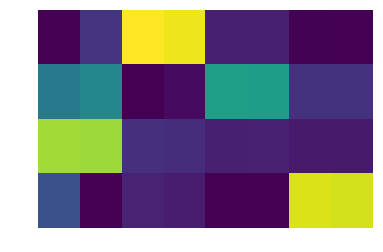

In [41]:
topic_vectors = model.get_expected_topic_vectors()
niceprint(topic_vectors, precision=5)
plt.imshow(topic_vectors, aspect='auto');
plt.gca().axis('off');